In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A Sample of the Dataset:

In [5]:
df = pd.read_csv('./extracted/energy_iter8.csv')
df.head()

,Date,DayPeakGen(MW),EveningPeakGen(MW),MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,14543,14949,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10596,11883,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,13760,15475,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,14372,14729,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,14138,14492,9850,14492,21.2,2024,12,lowTempSeason,No


### Null Values in the Dataset:

In [6]:
df.isnull().sum()

Date                  0
DayPeakGen(MW)        0
EveningPeakGen(MW)    0
MaxDemand(MW)         0
MaxGen(MW)            0
Temp(C)               0
Year                  0
Month                 0
Season                0
IsHoliday             0
dtype: int64

### The different types in our Dataset:

In [7]:
df.dtypes

Date                   object
DayPeakGen(MW)          int64
EveningPeakGen(MW)      int64
MaxDemand(MW)           int64
MaxGen(MW)              int64
Temp(C)               float64
Year                    int64
Month                   int64
Season                 object
IsHoliday              object
dtype: object

### Handling Duplication:

In [8]:
#total Number of Duplicates
df.duplicated().sum()

np.int64(13)

In [9]:
#check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)


Number of duplicate rows: 13
            Date  DayPeakGen(MW)  EveningPeakGen(MW)  MaxDemand(MW)  \
61    2024-11-01           12189               13366          13200   
185   2024-06-23           15157               17026          15000   
216   2024-05-23           15537               16810          16000   
329   2024-01-29           11135               11703          10700   
336   2024-01-22           10330               11175          10800   
337   2024-01-22           10330               11175          10800   
386   2023-11-30           12413               13713          11000   
509   2023-07-30           13380               15455          15700   
1137  2021-11-07           12797               14099          10400   
1165  2021-10-09           13298               14426          12800   
1179  2021-09-26           13988               14930          13300   
1434  2021-01-10           12459               13631           9500   
1436  2021-01-09           12413               1

In [10]:
#remove duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Sort chronologically and view:

In [11]:
#sorting in Decending order of Date
df = df.sort_values(by='Date', ascending=False)
df.head(10)

,Date,DayPeakGen(MW),EveningPeakGen(MW),MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,14543,14949,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10596,11883,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,13760,15475,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,14372,14729,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,14138,14492,9850,14492,21.2,2024,12,lowTempSeason,No
5,2024-12-27,13791,14419,10600,14419,21.4,2024,12,lowTempSeason,Yes
6,2024-12-26,13645,14092,10600,14092,21.9,2024,12,lowTempSeason,No
7,2024-12-25,12982,13683,10500,13683,21.2,2024,12,lowTempSeason,No
8,2024-12-24,12696,13349,10700,13349,20.5,2024,12,lowTempSeason,No
9,2024-12-23,12705,13515,10700,13515,20.4,2024,12,lowTempSeason,No


##Check Data Quality

In [12]:
df.describe()

,DayPeakGen(MW),EveningPeakGen(MW),MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12774.193431,14120.095499,12282.137470,14120.095499,27.233090,2022.167883,6.858881
std,1622.972287,1532.989559,1979.530122,1532.989559,3.811737,1.332597,3.405918
min,7966.000000,9482.000000,7800.000000,9482.000000,14.000000,2020.000000,1.000000
25%,11818.000000,13169.750000,10600.000000,13169.750000,24.800000,2021.000000,4.000000
50%,13042.000000,14440.500000,12400.000000,14440.500000,28.600000,2022.000000,7.000000
75%,13925.500000,15200.250000,13900.000000,15200.250000,30.000000,2023.000000,10.000000
max,16463.000000,17638.000000,17300.000000,17638.000000,33.800000,2024.000000,12.000000


###Data distribution over time

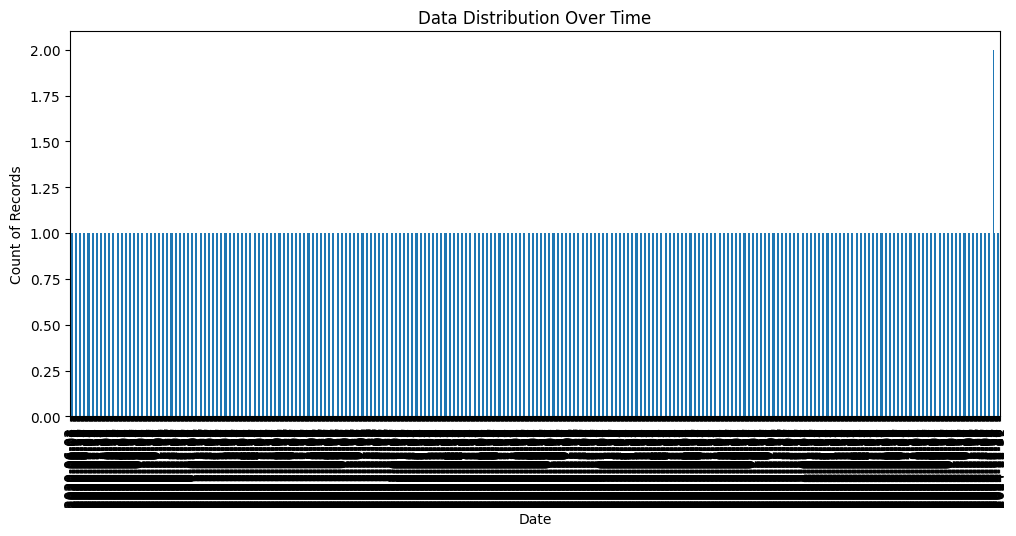

In [13]:
#Data distribution over time

import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])


# Count the number of entries each day
df.groupby(df['Date'].dt.date).size().plot(kind='bar', figsize=(12,5))

plt.title("Data Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Records")
plt.xticks(rotation=90)
plt.show()


#As, the all output bar in same height , so its almost equally distributed

###Check missing dates Between(01-01-2020 to 31-12-2024)

In [14]:
import pandas as pd

full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())
missing_dates = full_date_range.difference(df['Date'])

print("Missing Dates:", missing_dates)


Missing Dates: DatetimeIndex(['2021-01-03', '2021-02-09', '2021-02-10', '2021-09-11',
               '2021-09-23', '2021-09-24', '2021-10-10', '2021-10-26',
               '2021-11-09', '2022-08-08', '2023-01-24', '2023-03-16',
               '2023-04-02', '2023-05-09', '2023-05-17', '2023-07-06',
               '2023-07-31', '2023-12-30', '2024-01-01', '2024-01-02',
               '2024-01-03', '2024-01-11', '2024-01-28', '2024-01-30',
               '2024-01-31', '2024-05-22', '2024-06-04', '2024-06-24',
               '2024-07-02', '2024-07-19', '2024-07-20', '2024-07-21',
               '2024-07-22', '2024-07-23', '2024-07-24', '2024-11-16',
               '2024-12-18', '2024-12-20'],
              dtype='datetime64[ns]', freq=None)


## Now, we move on to visualization.

In [15]:
sns.set_palette(palette="flare")

### We start with a basic pairplot to get an overall idea of the kind of data we have.

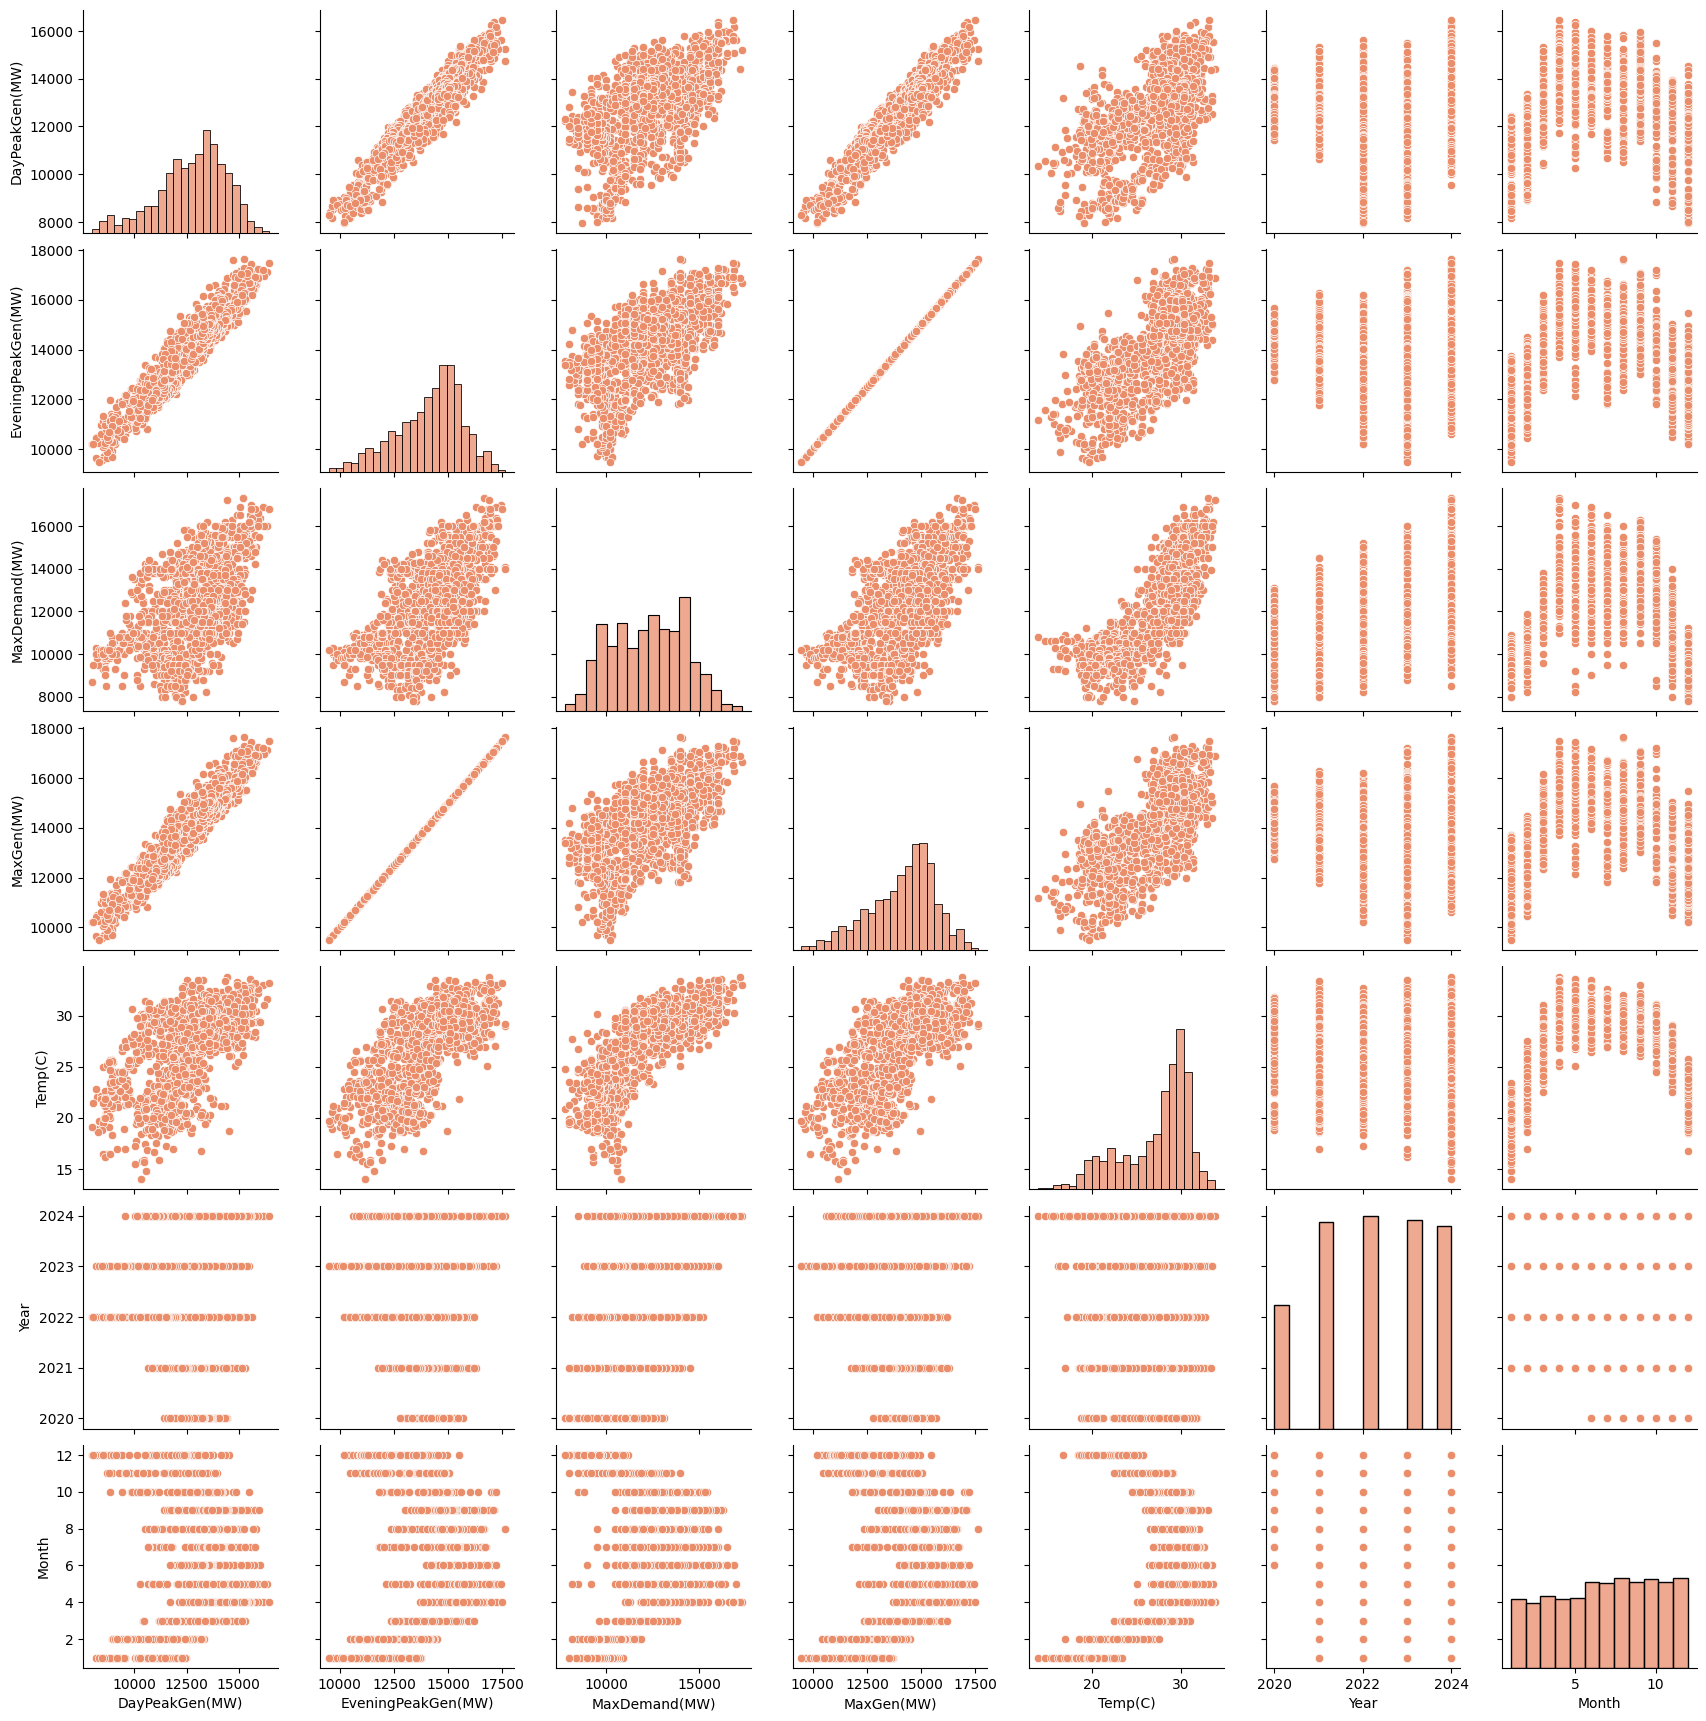

In [16]:
sns.pairplot(df)

## Next, let's visualize each feature separately.
### For numerical features, we'll be plotting their distribution, and for categorical, their bar charts.


#### DayPeakGen(MW), numerical:

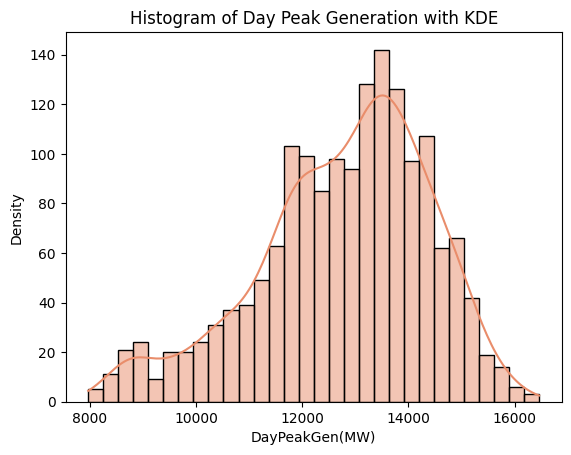

In [17]:
# Histogram for Day Peak Generation
sns.histplot(df['DayPeakGen(MW)'], bins=30, kde=True)
plt.xlabel('DayPeakGen(MW)')
plt.ylabel('Density')
plt.title('Histogram of Day Peak Generation with KDE')
plt.show()




#### EveningPeakGen(MW), numerical:

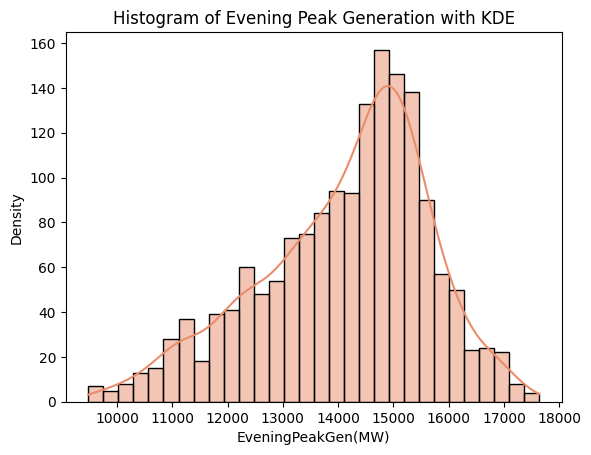

In [18]:
# Histogram for Evening Peak Generation
sns.histplot(df['EveningPeakGen(MW)'], bins=30, kde=True)
plt.xlabel('EveningPeakGen(MW)')
plt.ylabel('Density')
plt.title('Histogram of Evening Peak Generation with KDE')
plt.show()




#### MaxGeneration(MW), numerical:

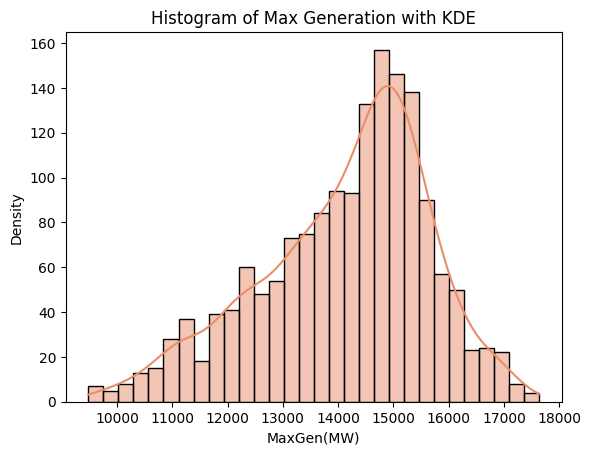

In [19]:
# Histogram for Max Generation
#Target Variable
sns.histplot(df['MaxGen(MW)'], bins=30, kde=True)
plt.xlabel('MaxGen(MW)')
plt.ylabel('Density')
plt.title('Histogram of Max Generation with KDE')
plt.show()


#### MaxDemand(MW), numerical:

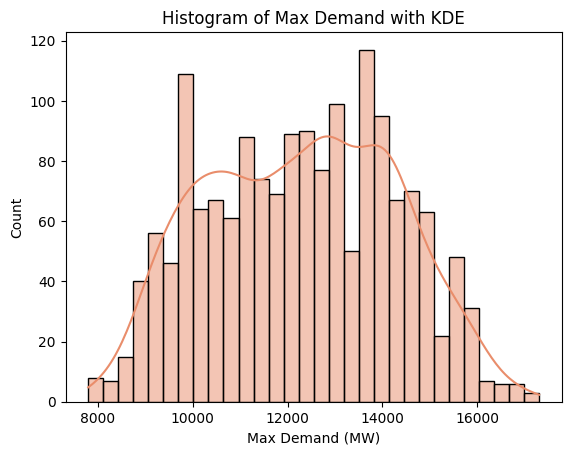

In [20]:
# Histogram for Max Demand
sns.histplot(df['MaxDemand(MW)'], bins=30, kde=True)  #kde=True adds a smooth density curve
plt.xlabel('Max Demand (MW)')
plt.ylabel('Count')
plt.title('Histogram of Max Demand with KDE')
plt.show()



#### Temp(C), numerical:

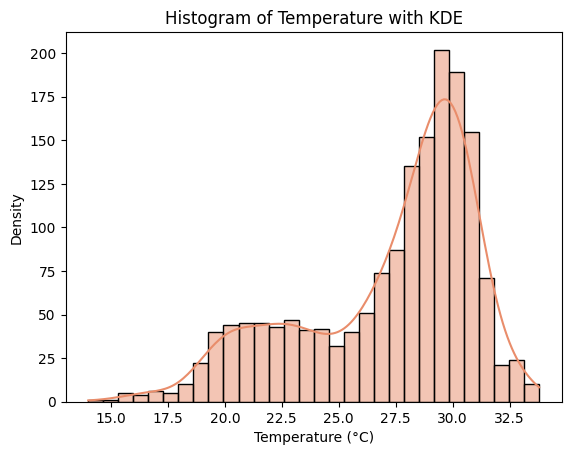

In [21]:
# Histogram for Temperature
sns.histplot(df['Temp(C)'], bins=30, kde=True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Histogram of Temperature with KDE')
plt.show()




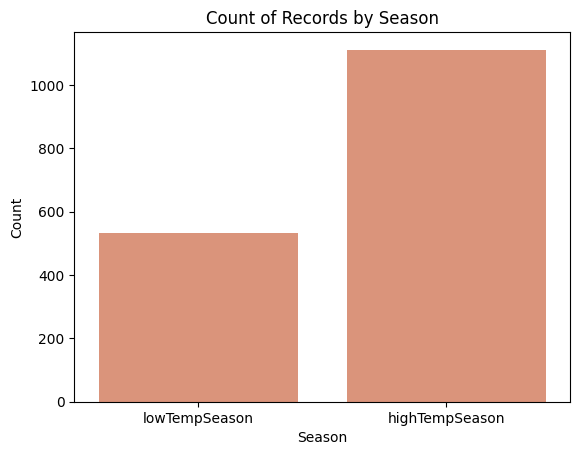

In [22]:
# Bar chart for Season
sns.countplot(x='Season', data=df)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Records by Season')
plt.show()

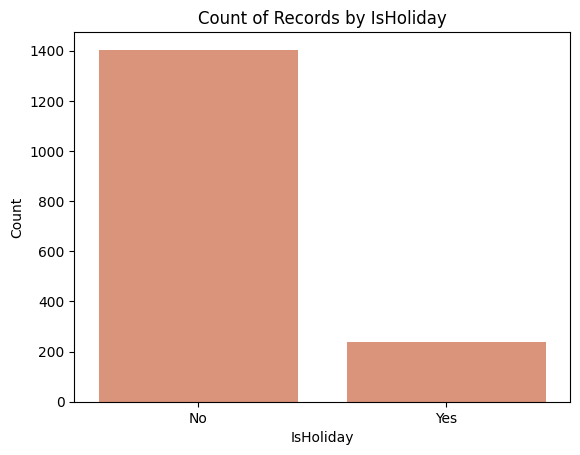

In [23]:
# Bar chart for IsHoliday
sns.countplot(x='IsHoliday', data=df)
plt.xlabel('IsHoliday')
plt.ylabel('Count')
plt.title('Count of Records by IsHoliday')
plt.show()

### We may detect outliers in the data by using a box-and-whiskers plot.

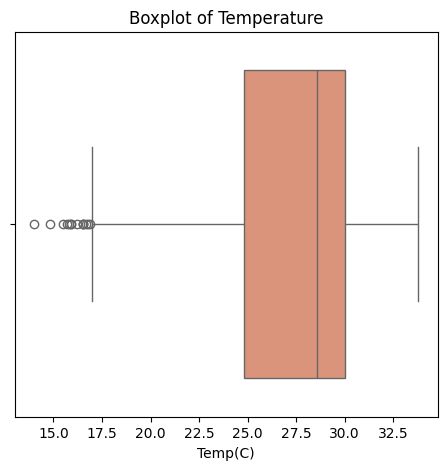

In [24]:
# Plot boxplots for outlier detection(Temperature)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Temp(C)'])
plt.title('Boxplot of Temperature')


plt.show()


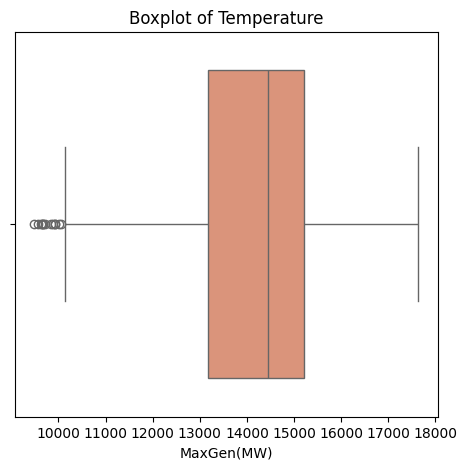

In [25]:
# Plot boxplots for outlier detection(Temperature)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxGen(MW)'])
plt.title('Boxplot of Temperature')


plt.show()

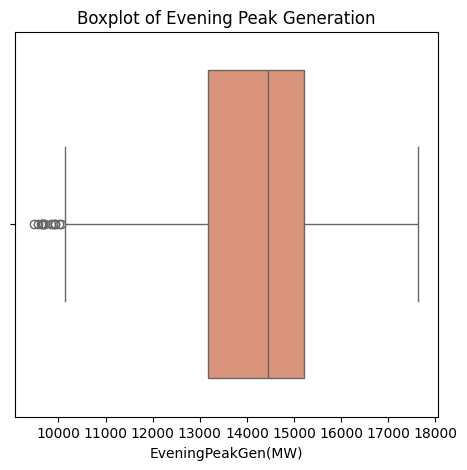

In [26]:
# Plot boxplots for outlier detection(Evening Peak Generation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['EveningPeakGen(MW)'])
plt.title('Boxplot of Evening Peak Generation')


plt.show()

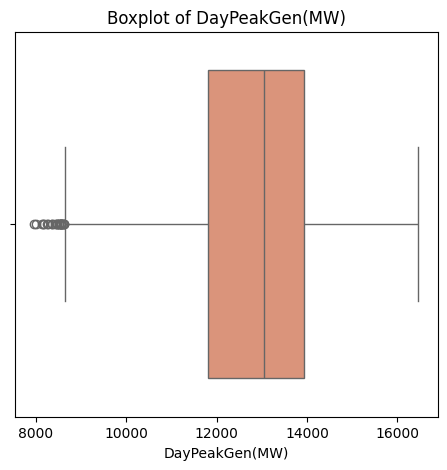

In [27]:
# Plot boxplots for outlier detection(Day Peak Generation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['DayPeakGen(MW)'])
plt.title('Boxplot of DayPeakGen(MW)')


plt.show()

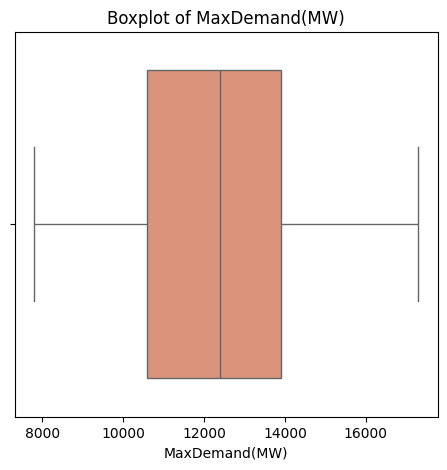

In [28]:
# Plot boxplots for outlier detection(Max Demand)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['MaxDemand(MW)'])
plt.title('Boxplot of MaxDemand(MW)')


plt.show()

###Find the Number of Outliers (int)

In [29]:
#Temperature

Q1 = df["Temp(C)"].quantile(0.25)
Q3 = df["Temp(C)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["Temp(C)"] < lower_bound) | (df["Temp(C)"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in Temp(C): {num_outliers}")


Number of outliers in Temp(C): 14


In [30]:
#Max Generation

Q1 = df["MaxGen(MW)"].quantile(0.25)
Q3 = df["MaxGen(MW)"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["MaxGen(MW)"] < lower_bound) | (df["MaxGen(MW)"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in MaxGen(MW): {num_outliers}")


Number of outliers in MaxGen(MW): 13


In [31]:
#Day Peak Generation

Q1 = df["DayPeakGen(MW)"].quantile(0.25)
Q3 = df["DayPeakGen(MW)"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["DayPeakGen(MW)"] < lower_bound) | (df["DayPeakGen(MW)"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in DayPeakGen(MW): {num_outliers}")

Number of outliers in DayPeakGen(MW): 26


In [32]:
#Evening Peak Generation

Q1 = df["EveningPeakGen(MW)"].quantile(0.25)
Q3 = df["EveningPeakGen(MW)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers
outliers = df[(df["EveningPeakGen(MW)"] < lower_bound) | (df["EveningPeakGen(MW)"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers EveningPeakGen(MW): {num_outliers}")

Number of outliers EveningPeakGen(MW): 13


In [33]:
#Max Demand

Q1 = df["MaxDemand(MW)"].quantile(0.25)
Q3 = df["MaxDemand(MW)"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df["MaxDemand(MW)"] < lower_bound) | (df["MaxDemand(MW)"] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in MaxDemand(MW): {num_outliers}")

Number of outliers in MaxDemand(MW): 0


#### Season, categorical:

## To detect trends in Electricity Generation, we may plot the MaxDemand and MaxGen over time.

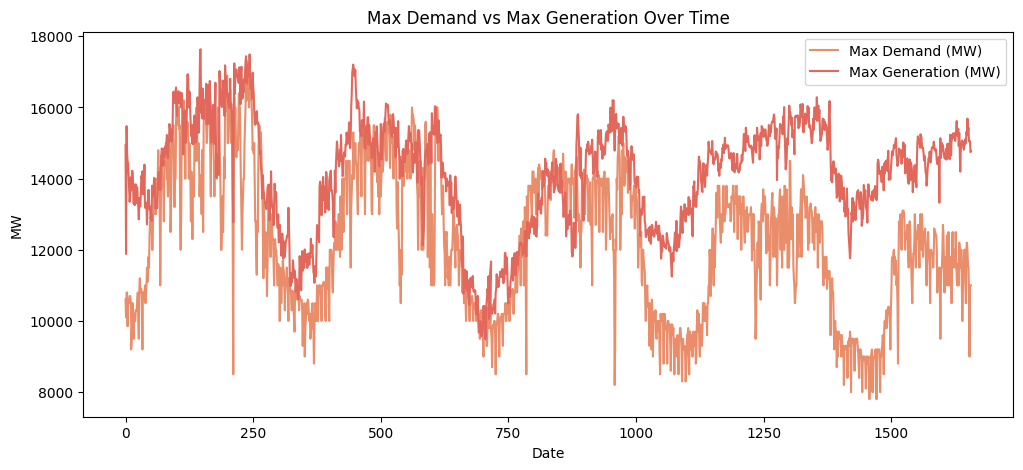

In [34]:
plt.figure(figsize=(12, 5))

plt.plot(df.index, df['MaxDemand(MW)'], label="Max Demand (MW)")
plt.plot(df.index, df['MaxGen(MW)'], label="Max Generation (MW)")

plt.xlabel('Date')
plt.ylabel('MW')

plt.legend()
plt.title('Max Demand vs Max Generation Over Time')
plt.show()

### Furthermore, we can get granular with the time analysis as we plot the demanded electricty for each year, by month.

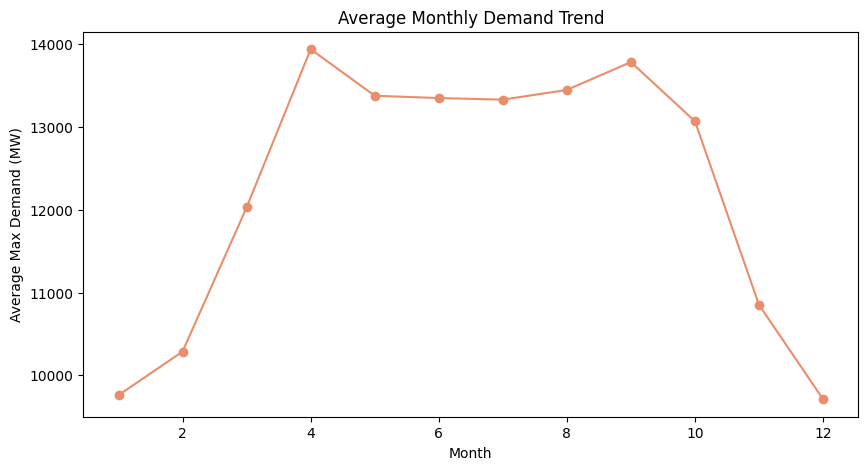

In [35]:
monthly_avg = df.groupby("Month")["MaxDemand(MW)"].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Max Demand (MW)")
plt.title("Average Monthly Demand Trend")
plt.show()

## Finally, we have a correlation matrix to help us find relevant features.

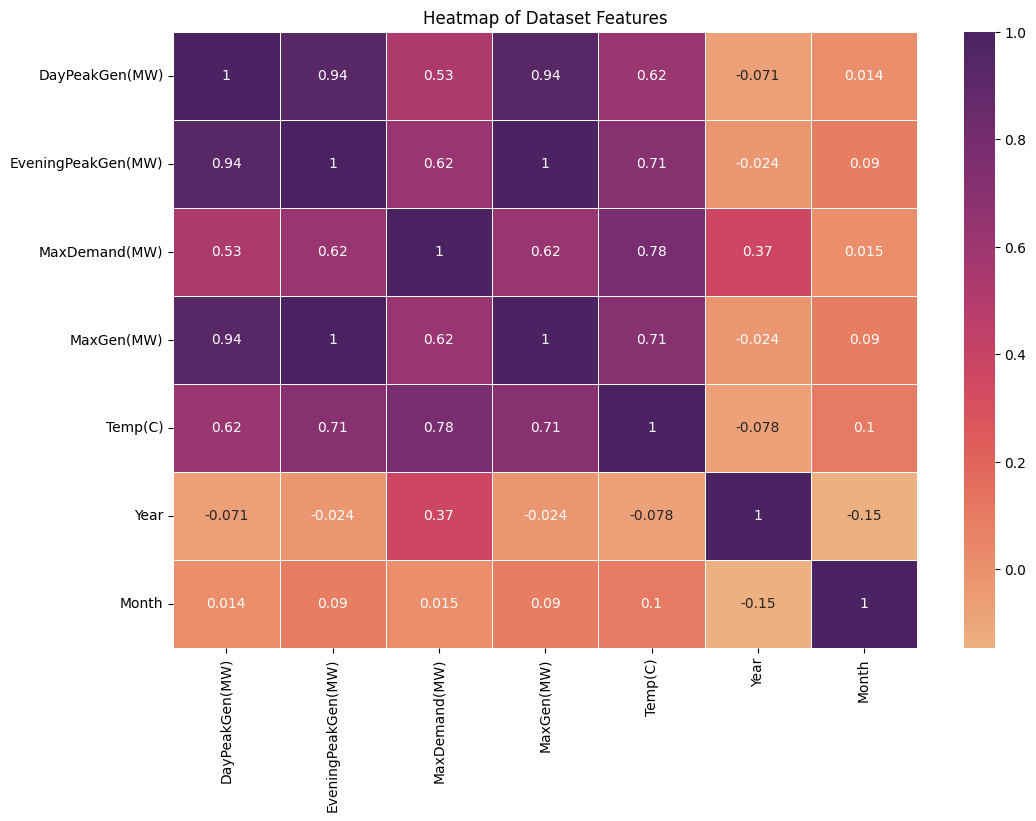

In [36]:
# Generate a heatmap for the dataset

plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Exclude non-numeric columns

sns.heatmap(numeric_df.corr(), annot=True, cmap='flare', linewidths=0.5)
plt.title('Heatmap of Dataset Features')
plt.show()